In [1]:
import analyse
import importlib
import MDAnalysis as mda
import matplotlib.pyplot as plt
import MDAnalysis.analysis.rms as rms
import pandas as pd
import MDAnalysis.analysis.hbonds

In [2]:
importlib.reload(analyse)

<module 'analyse' from '/Users/evabertalan/Dropbox/research_proj/code/analyse.py'>

In [3]:
def save_figure(fig, target):
    fig.savefig(target)

In [4]:
PDB_CODE = '6b73'
SEQ = 'B'
folder = '../'+PDB_CODE+SEQ+'/'
results_folder = folder+'results/'
plot_folder = folder+'plots/'

In [5]:
trajectory =  mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', [results_folder+'namd/step7.1_production.dcd', results_folder+'namd/step7.2_production.dcd'])
ref = mda.Universe(folder+PDB_CODE+'_inp.pdb')

In [27]:
u1 = mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', results_folder+'namd/step7.1_production.dcd').transfer_to_memory(start=100, stop=200)
print(len(u1.trajectory))

AttributeError: 'NoneType' object has no attribute 'trajectory'

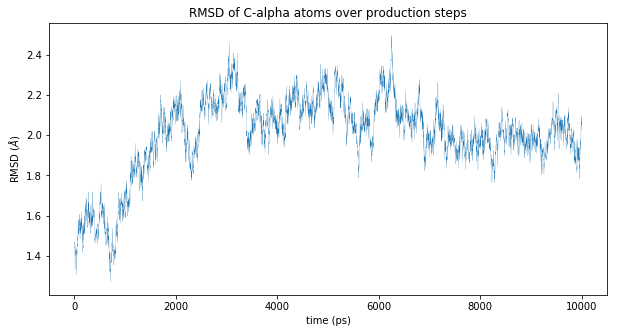

In [24]:
title = 'RMSD of C-alpha atoms over production steps'
R, r_fig = analyse.rmsd_traj(u1, ref, title)

In [7]:
# save_figure(r_fig[0].figure, plot_folder+'prod_rmsd')

In [8]:
pdb_file = folder+PDB_CODE+'_inp.pdb'
struct = analyse.secondary_structure(pdb_file)

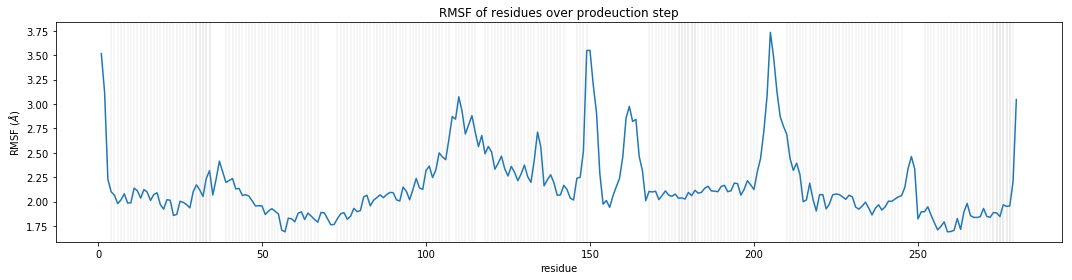

In [18]:
rmsf_fig = analyse.rmsf_plot([u1], title='RMSF of residues over prodeuction step', structure=struct)

In [10]:
# save_figure(rmsf_fig, plot_folder+'prod_rmsf')

In [21]:
h = mda.analysis.hbonds.HydrogenBondAnalysis(u1, selection1='protein', selection2='protein', selection1_type='both', distance=3.0, angle=120.0)
h.run()

AttributeError: 'FrameIteratorSliced' object has no attribute 'select_atoms'

In [ ]:
h.generate_table()
df = pd.DataFrame.from_records(h.table)
df.hist(column=["angle", "distance"])

In [ ]:
print(df)

In [25]:
print(len(u1.trajectory))

5000


In [ ]:
u1 = mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', results_folder+'namd/step7.1_production.dcd')
print(len(u1.trajectory))
protein = u.select_atoms("protein")
with MDAnalysis.Writer("protein.xtc", protein.n_atoms) as W:
    for ts in u.trajectory:
        W.write(protein)